In [1]:
import sys

!{sys.executable} --version

Python 3.12.8


https://github.com/DeepReinforcementLearning/DeepReinforcementLearningInAction

## Sampling 

In [2]:
from collections import deque

replay = deque(maxlen=10)
for i in range(20):
    replay.append(i)

replay

deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)

In [3]:
import random

random.sample(replay, 5)

[13, 12, 16, 11, 14]

## Index

In [4]:
replay = deque(maxlen=10)
for i in range(20):
    replay.append((i, i + 1, i + 2))
replay

deque([(10, 11, 12),
       (11, 12, 13),
       (12, 13, 14),
       (13, 14, 15),
       (14, 15, 16),
       (15, 16, 17),
       (16, 17, 18),
       (17, 18, 19),
       (18, 19, 20),
       (19, 20, 21)],
      maxlen=10)

In [5]:
sample = random.sample(replay, 5)
sample

[(11, 12, 13), (14, 15, 16), (16, 17, 18), (13, 14, 15), (19, 20, 21)]

In [6]:
import numpy as np

np.array(sample)[:, [0]]

array([[11],
       [14],
       [16],
       [13],
       [19]])

## Torch

In [7]:
import torch

a = torch.Tensor([[1, 2, 3]])
b = torch.Tensor([[4, 5, 6]])
torch.cat((a, b), 0)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [8]:
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6.]])

In [9]:
torch.flip(torch.arange(10), dims=(0,))

tensor([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [10]:
sample = torch.rand(3, 4)
sample

tensor([[0.6962, 0.6530, 0.1535, 0.4092],
        [0.0253, 0.5769, 0.4183, 0.9447],
        [0.1687, 0.6930, 0.1764, 0.7830]])

In [11]:
torch.flip(sample, dims=(0,))

tensor([[0.1687, 0.6930, 0.1764, 0.7830],
        [0.0253, 0.5769, 0.4183, 0.9447],
        [0.6962, 0.6530, 0.1535, 0.4092]])

In [12]:
torch.flip(sample, dims=(0, 1))

tensor([[0.7830, 0.1764, 0.6930, 0.1687],
        [0.9447, 0.4183, 0.5769, 0.0253],
        [0.4092, 0.1535, 0.6530, 0.6962]])

In [13]:
torch.flip(sample, dims=(1,))

tensor([[0.4092, 0.1535, 0.6530, 0.6962],
        [0.9447, 0.4183, 0.5769, 0.0253],
        [0.7830, 0.1764, 0.6930, 0.1687]])

## Setting up gym

done


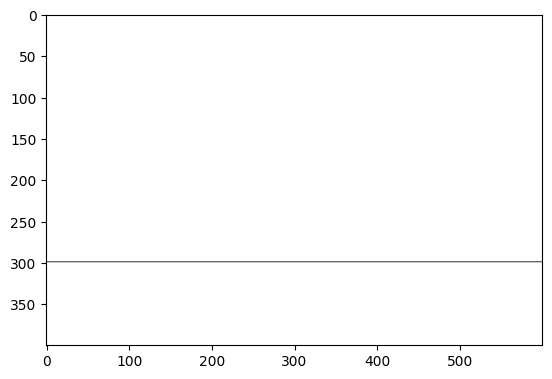

In [14]:
# pip install gymnasium[classic-control]
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render())  # Just call this once.
for i in range(100):
    img.set_data(env.render())
    # plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    env.step(env.action_space.sample())  # take a random action

env.close()
print("done")

In [15]:
from collections import namedtuple

Transition = namedtuple("Transition", ["state", "action", "reward"])

t = Transition("up", 1, 10)
t.state

'up'

In [16]:
transitions = [Transition("up", i, 10) for i in range(10)]
transitions

[Transition(state='up', action=0, reward=10),
 Transition(state='up', action=1, reward=10),
 Transition(state='up', action=2, reward=10),
 Transition(state='up', action=3, reward=10),
 Transition(state='up', action=4, reward=10),
 Transition(state='up', action=5, reward=10),
 Transition(state='up', action=6, reward=10),
 Transition(state='up', action=7, reward=10),
 Transition(state='up', action=8, reward=10),
 Transition(state='up', action=9, reward=10)]

In [17]:
batch = Transition(*zip(*transitions))
batch

Transition(state=('up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up'), action=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), reward=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10))

In [18]:
batch.state

('up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up')

In [19]:
batch.action

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)